In [130]:
import numpy as np
import matplotlib.pyplot as plt
import tstrippy
from astropy import units as u
from astropy import constants as const
import numericalErrorFunctions as NEF
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
})

In [ ]:
GCdata          =   tstrippy.Parsers.baumgardtMWGCs().data
MWparams        =   tstrippy.Parsers.potential_parameters.pouliasis2017pii()
MWrefframe      =   tstrippy.Parsers.potential_parameters.MWreferenceframe()
x,y,z,vx,vy,vz  =   NEF.load_globular_clusters_in_galactic_coordinates(MWrefframe)
G = const.G
G=G.to(tstrippy.Parsers.unitbasis['G'])

In [133]:
# get the crossing time of the clusters 
vGCs = np.sqrt(vx**2 + vy**2 + vz**2)
rGCS = np.sqrt(x**2 + y**2 + z**2)
tcrossGCs = ((rGCS / vGCs) * u.Unit(tstrippy.Parsers.unitbasis['time'])).to(u.yr)
# get the internal dynamical time 
tdyn=np.sqrt(GCdata['rh_m']**3 / (G*GCdata['Mass'])).to(u.yr)

In [ ]:
nbins = int(np.ceil(len(GCdata)))
binednges = 10**np.linspace(np.log10(tdyn.min().value), np.log10(tcrossGCs.max().value), nbins+1)

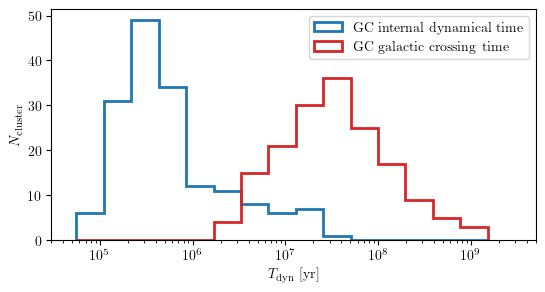

In [138]:
fig,axis=plt.subplots(1,1,figsize=(8.25-2,3))
axis.hist(tdyn.value, bins=binednges,  histtype='step', color='tab:blue', lw=2, label=r"$\mathrm{GC~internal~dynamical~time}$")
axis.hist(tcrossGCs.value, bins=binednges,  histtype='step', color='tab:red', lw=2, label=r"$\mathrm{GC~galactic~crossing~time}$")
axis.set_xscale('log')
axis.set_xlabel(r'$T_{\mathrm{dyn}}~[\mathrm{yr}]$', fontsize="medium")
axis.set_ylabel(r'$N_{\mathrm{cluster}}$', fontsize="medium")
ylims = axis.get_ylim()
axis.set_ylim(0, ylims[1])
axis.set_xlim(3e4,5e9)
axis.legend(fontsize="medium", loc='best')
fig.savefig("../../images/GCsystemCharacteristicTimes.png", bbox_inches='tight', dpi=300)